In [261]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [328]:
df=pd.read_csv('Metro_Interstate_Traffic_Volume.csv',delimiter=';')

In [330]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [264]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [265]:
df.shape

(48204, 9)

In [266]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [268]:
df=df.drop(columns=['holiday'])

In [269]:
df.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [270]:
df['date_time']=pd.to_datetime(df['date_time'])

df['day']=df['date_time'].dt.day
df['year']=df['date_time'].dt.year
df['month']=df['date_time'].dt.month
df['hour']=df['date_time'].dt.hour

In [271]:
df=df.drop(columns=['date_time'])

In [272]:
df

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume,day,year,month,hour
0,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2,2012,10,9
1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2,2012,10,10
2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2,2012,10,11
3,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2,2012,10,12
4,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2,2012,10,13
...,...,...,...,...,...,...,...,...,...,...,...
48199,283.45,0.0,0.0,75,Clouds,broken clouds,3543,30,2018,9,19
48200,282.76,0.0,0.0,90,Clouds,overcast clouds,2781,30,2018,9,20
48201,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2159,30,2018,9,21
48202,282.09,0.0,0.0,90,Clouds,overcast clouds,1450,30,2018,9,22


In [273]:
df.duplicated().sum()

17

In [274]:
df=df.drop_duplicates()

In [275]:
df.shape

(48187, 11)

<Axes: xlabel='year'>

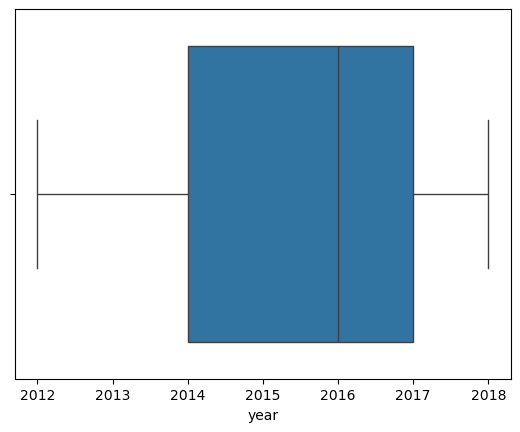

In [276]:
sns.boxplot(x=df['year'])

<Axes: xlabel='clouds_all', ylabel='Count'>

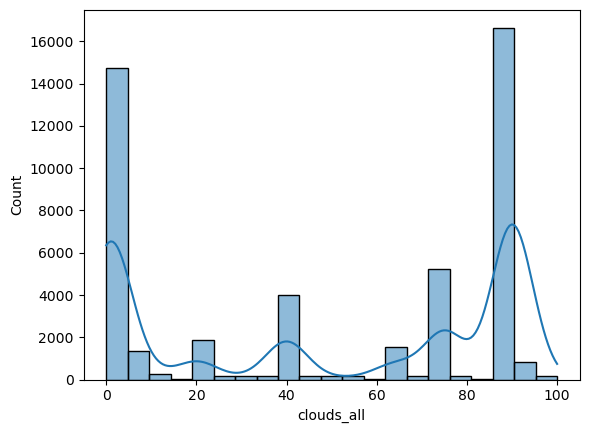

In [277]:
sns.histplot(x=df['clouds_all'],kde=True)

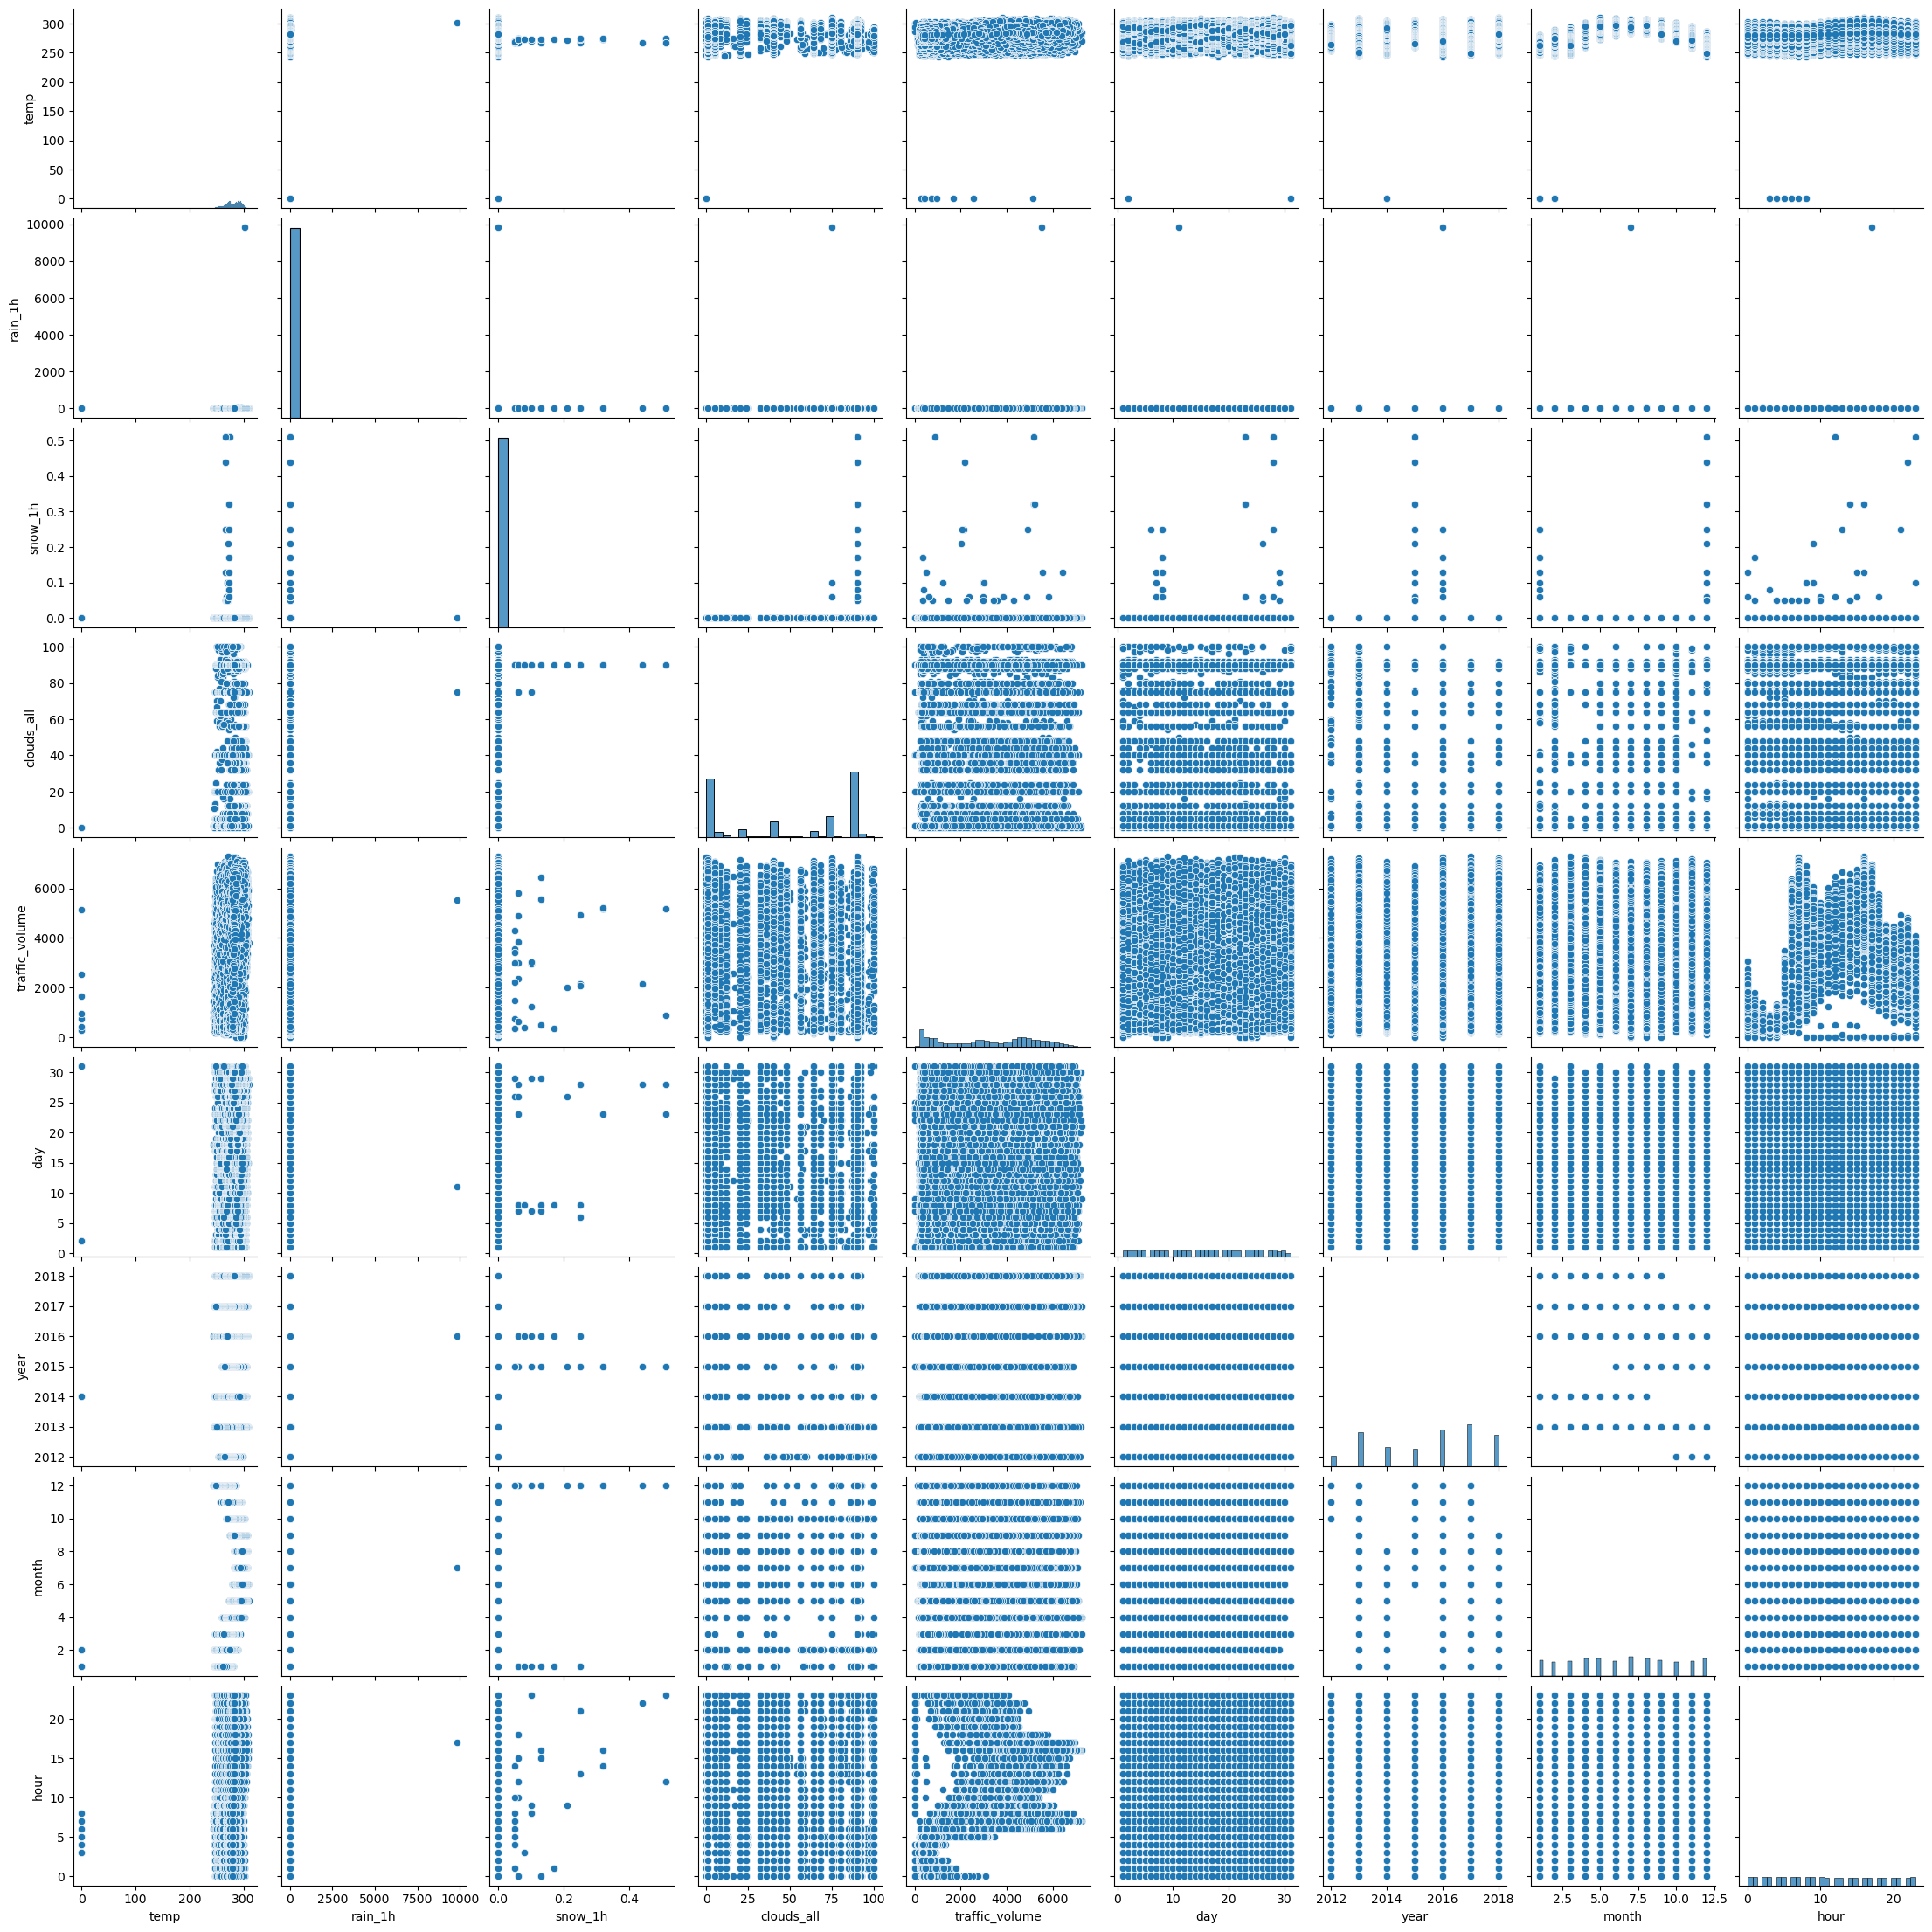

In [278]:
sns.pairplot(df)

In [279]:
df['temp'].skew()

-2.2474797286662054

In [280]:
df_encoded=df.copy()
df_encoded=pd.get_dummies(df,columns=['weather_main','weather_description'],drop_first=True)
df_encoded=df_encoded.astype(int)

In [281]:
df_encoded.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day,year,month,hour,weather_main_Clouds,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,288,0,0,40,5545,2,2012,10,9,1,...,0,0,0,0,0,0,0,0,0,0
1,289,0,0,75,4516,2,2012,10,10,1,...,0,0,0,0,0,0,0,0,0,0
2,289,0,0,90,4767,2,2012,10,11,1,...,0,0,0,0,0,0,0,0,0,0
3,290,0,0,90,5026,2,2012,10,12,1,...,0,0,0,0,0,0,0,0,0,0
4,291,0,0,75,4918,2,2012,10,13,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: >

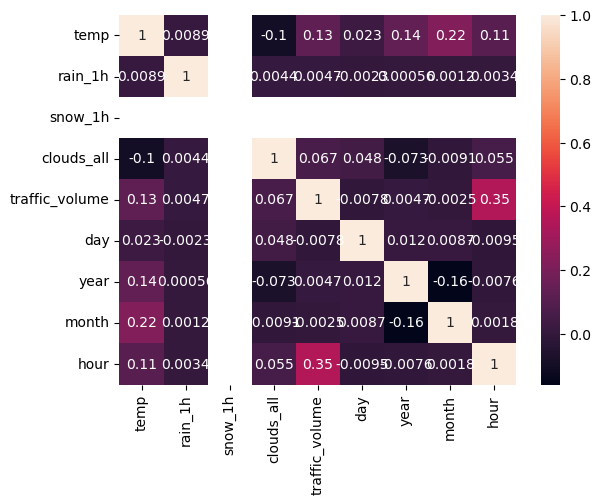

In [324]:
correlation_matrix=df_encoded[['temp','rain_1h','snow_1h','clouds_all','traffic_volume','day','year','month','hour']].corr()
sns.heatmap(correlation_matrix,annot=True)

In [282]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df_scaled=df_encoded.copy()
df_scaled[['clouds_all','temp','day','year','month','hour']]=scaler.fit_transform(df_scaled[['clouds_all','temp','day','year','month','hour']])
df_scaled.head()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume,day,year,month,hour,weather_main_Clouds,...,weather_description_sleet,weather_description_smoke,weather_description_snow,weather_description_thunderstorm,weather_description_thunderstorm with drizzle,weather_description_thunderstorm with heavy rain,weather_description_thunderstorm with light drizzle,weather_description_thunderstorm with light rain,weather_description_thunderstorm with rain,weather_description_very heavy rain
0,0.545935,0,0,-0.240049,5545,-1.574987,-1.854915,1.027795,-0.345481,1,...,0,0,0,0,0,0,0,0,0,0
1,0.620905,0,0,0.657047,4516,-1.574987,-1.854915,1.027795,-0.201395,1,...,0,0,0,0,0,0,0,0,0,0
2,0.620905,0,0,1.041516,4767,-1.574987,-1.854915,1.027795,-0.057309,1,...,0,0,0,0,0,0,0,0,0,0
3,0.695875,0,0,1.041516,5026,-1.574987,-1.854915,1.027795,0.086777,1,...,0,0,0,0,0,0,0,0,0,0
4,0.770846,0,0,0.657047,4918,-1.574987,-1.854915,1.027795,0.230863,1,...,0,0,0,0,0,0,0,0,0,0


In [283]:
from sklearn.model_selection import train_test_split

x=df_scaled[['temp','rain_1h','snow_1h','clouds_all','day','year','month','hour','weather_main_Clouds','weather_description_sleet','weather_description_smoke','weather_description_snow','weather_description_thunderstorm','weather_description_thunderstorm with drizzle','weather_description_thunderstorm with heavy rain','weather_description_thunderstorm with light drizzle','weather_description_thunderstorm with light rain','weather_description_thunderstorm with rain','weather_description_very heavy rain']]
y=df_scaled['traffic_volume']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [284]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=root_mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

print(mae)
print(mse)
print(rmse)
print(r2)

1693.3052755386905
36566739.126938984
6047.043833720654
-0.09331451806100022


In [285]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

dt=DecisionTreeRegressor(max_depth=None,min_impurity_decrease=0.0,max_leaf_nodes=None,random_state=42)
dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=root_mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

print(mae)
print(mse)
print(rmse)
print(r2)

512.2167462129072
978753.2289894168
989.3195787961628
0.7540639812454042


In [286]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

ab=AdaBoostRegressor(random_state=42,learning_rate=0.1,n_estimators=10)
ab.fit(X_train,y_train)

y_pred=ab.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=root_mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

print(mae)
print(mse)
print(rmse)
print(r2)

693.2573353693374
953715.5635098987
976.5836182887253
0.6704690112600697


In [287]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score

gb=GradientBoostingRegressor(learning_rate=0.1,max_depth=None,min_impurity_decrease=0.0,max_leaf_nodes=None)
gb.fit(X_train,y_train)

y_pred=gb.predict(X_test)

mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=root_mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)

print(mae)
print(mse)
print(rmse)
print(r2)

500.9900108373644
928876.104650856
963.7821873488097
0.7629764842882967
